## 2.1 Fourier Analysis in Two Dimensions
---
The **Fourier transform** is a mathematical tool used for the analysis of linear and non-linear phenomena. Your textbook assumes previous introduction to Fourier analysis (Mizzou's ECE 3830, ECE 4830) and extends typical one-dimensional analysis to two-dimensions.

---
### Why do we care?
This chapter is intended to build a *mathematical toolbox* for us to use when we start to do optical computations. As we will see later (Chapters 3-6) we employ ideas like the Huygens-Fresnel principle (the decomposing wavefronts into ensembles of independent point-sources) to build the foundations of Scalar Diffraction theory. It turns out that the electromagnetic equations for the propagation of wavefronts (under Scalar Diffraction theory assumptions) looks identical to the Fourier Transform of a two-dimensional signal (under certain physical conditions). This means that if we want to calculate the propagation of a two-dimensional wavefront, we can simply take the Fourier Transform of the source wavefront. 

This mathematical equivelence between the Fourier Transform of a two-dimensional signal and the propagation of a wavefront leads to deeper connections between Fourier Analysis and the tools/theorems/properties therein, with physical optical devices like lenses and apertures. Take for example the optical 4F system below:

| <img src="4fsystem.jpg" alt="4F System" width="500"/>|
| :--: |
|Piché, Kevin & Leach, Jonathan & Johnson, Allan & Salvail, Jeff & Kolobov, Mikhail & Boyd, Robert. (2012). Experimental realization of optical eigenmode super-resolution. Optics express. 20. 26424-33. 10.1364/OE.20.026424. |

Physically, we know that lenses focus light to a focal plane a known distance from the lens (a function of the curvature and index of refraction of the lens). The first lens in this diagram does exactly this onto the 'pupil plane'. As we will derive later (section 6.2), the mathematics of this focusing is identical to the Fourier Transform of the incident wavefront. This means that the wavefront at the pupil plane is the **spatial frequency spectrum** of the incident wavefront. By spatially restricting the wavefront at this plane by an aperture, we perform the equivelent of a **low-pass filter** on the original wavefront (identical to the various filtering windows discussed in ECE 4830). Finally, the second lens performs the inverse Fourier transform of the wavefront. The result at the image plane is a low-pass filtered version of the original wavefront.

The motivation for a deep understanding of Fourier Analysis, therefore, is this direct connection between the mathematics and physical devices that we will encounter in the lab. As a thought experiment, what would the physical aperture at the pupil plane in the previous 4F system need too look like to perform a **high-pass filter**?

---

### 2.1.1 Definition and Existence Conditions
The Fourier transform of a (in general, complex-valued) function $g(x,y)$ of two independent variables $x$ and $y$ is represented by $\mathcal{F}\{g\}$ and is defined as:
\begin{equation}
\mathcal{F}\{g\} = \iint_{-\infty}^{\infty} g(x,y) exp[-j2\pi (f_X x + f_Y y) ] dx dy.
\end{equation}

The transform is itself a complex-valued function of two independent variables $f_Y$ and $f_X$ which is generally referred to as **frequencies**. The **inverse Fourier transform** of a function $G(f_X, f_Y)$ is represented by $\mathcal{F}^{-1}\{G\}$ and is defined as:
\begin{equation}
\mathcal{F}\{G\} = \iint_{-\infty}^{\infty} G(f_X,f_Y) exp[j2\pi (f_X x + f_Y y) ] df_X df_Y.
\end{equation}

For both the Fourier transform and inverse Fourier transform, there are several mathimatical conditions placed on $g(x,y)$ such that the operations can be performed. It's often the case that we are interested in functions that violate these conditions and therefore we can not perform the Fourier transform and inverse Fourier transforms. In these cases, we move to a more general form of the Fourier and Inverse Fourier transforms where we represent our 'incompatible' functions as the limit of a sequence of functions that are transformable. While we wont get into specifics, it's important to understand that many of the Fourier transform / inverse Fourier transform pairs that we typically see listed in tables (like Table 2.1 in Goodman) may be 'generalized transforms'. 

### 2.1.2 The Fourier Transform as a Decomposition
We can interpret the two-dimensional Fourier transform as a decomposition of a function $g(x,y)$ into a linear combination of elementary functions of the form $exp[j2\pi(f_X x + f_Y y)]$. Goodman points out some interesting properties of these functions including **lines of zero phase**, **directed angle**, and the **spatial period**. Let's look at these ourselves with a little bit of Python

In [44]:
# Import standard libraries for symbolic math, and visualizations
import numpy as np
from sympy import *
from sympy.plotting import plot3d, plot

import matplotlib.pyplot as plt

#Lets make our figures interactable
%matplotlib widget

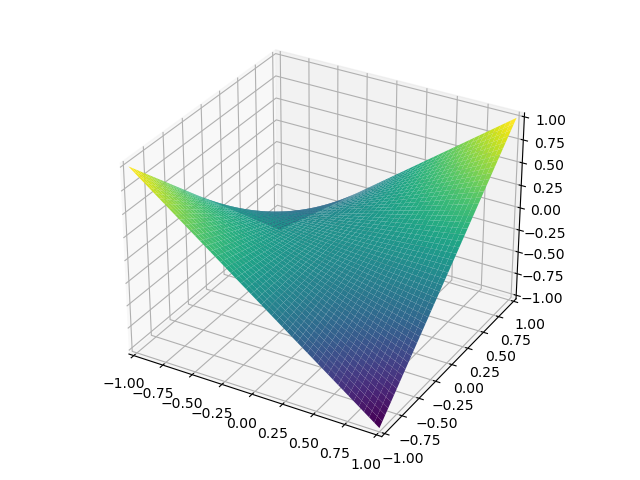

In [34]:
# As this is the first example in this notebook, let's do a quick validation that things are working correctly
plt.close('all')

x,y = symbols('x y')
equation = x*y
plot3d(equation, (x, -1, 1), (y, -1,1))

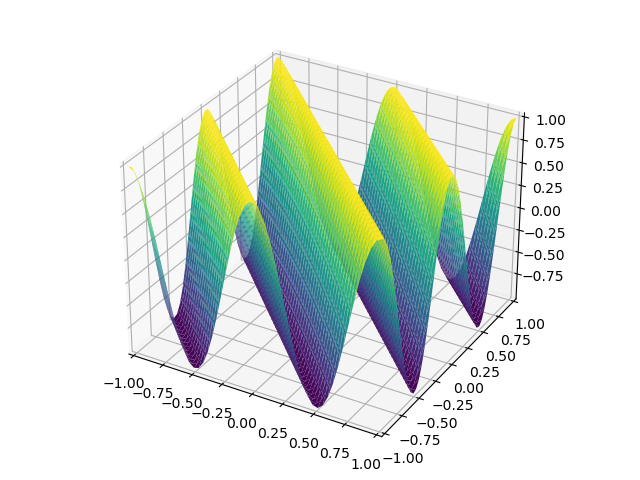

In [10]:
#Now our functions of interest
plt.close('all')

fx = 1
fy = 1
equation = exp(I * 2 * pi * (fx * x + fy * y))
plot3d(equation, (x,-1,1), (y, -1,1))

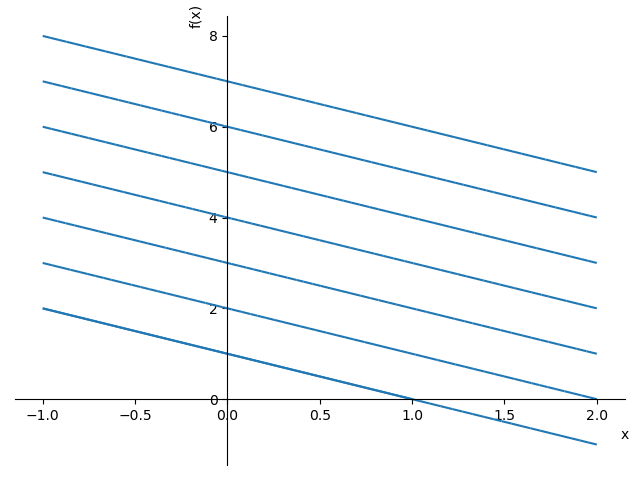

In [56]:
plt.close('all')
p = plot((-fx / fy)*x + (1 / fy), (x, -1,1), show=False)
for n in range(1,8):
    p1 = plot((-fx / fy)*x + (n / fy), (x, -1,2), show=False)
    p2 = plot(1/sqrt(fx**2 + fy**2), (x,0,2), show=False)
    p.append(p1[0])

p.show()

### Problem 2-1
---
##### Prove the following properties of $\delta$ function:

1. $\delta(ax,by) = \frac{1}{|ab|} \delta(x,y)$
2. $comb(ax)comb(by) = \frac{1}{|ab|}\sum^\infty_{n=-\infty} \sum^\infty_{m=-\infty} \delta(x-\frac{n}{a}, y - \frac{m}{b})$

### Problem 2-2
---
##### Prove the following Fourier transform relations:

1. $\mathcal{F} \{rect(x) rect(y)\} = sinc(f_X) sinc(f_Y)$
2. $\mathcal{F} \{ \Lambda (x) \Lambda (y) \} = sinc^2(f_X) sinc^2(f_Y)$

### Problem 2-3
---
##### Prove the following Fourier transform theorems:

1. $\mathcal{F} \mathcal{F} \{g(x,y) \}  =  \mathcal{F}^{-1} \mathcal{F}^{-1} \{ g(x,y)\} = g(-x,-y)$ at all points of continuity of $g(\cdot)$.
2. $\mathcal{F} \{ g(x,y) h(x,y) \} = \mathcal{F} \{ g(x,y) \} * \mathcal{F}\{ h(x,y) \} $
3. $\mathcal{F} \left\{ \nabla^2 g(x,y)\right\} = -4\pi^2(f_X^2 + f_Y^2)\mathcal{F}\{ g(x,y)\}$ where $\nabla^2$ is the Laplacian Operator, 

\begin{equation}
\nabla^2 = \frac{\partial^2}{\partial x^2} +\frac{\partial^2}{\partial y^2}
\end{equation}

### Problem 2-4
---
##### Let the transform operators $\mathcal{F}_A \{\cdot \}$ and $\mathcal{F}_B \{\cdot \}$ be defined by
\begin{align}
\mathcal{F}_A \{g\} &= \frac{1}{a} \iint_{-\infty}^{\infty}g(\xi, \eta) exp\left[ -j\frac{2\pi}{a}(f_X \xi + f_Y \eta) \right]d\xi d\eta \\
\mathcal{F}_B \{g\} &= \frac{1}{b} \iint_{-\infty}^{\infty}g(\xi, \eta) exp\left[ -j\frac{2\pi}{b}(x \xi + y \eta) \right]d\xi d\eta
\end{align}

1. Find a simple interpretation for 
\begin{equation}
\mathcal{F}_B \{ \mathcal{F}_A \{ g(x,y) \} \}
\end{equation}
2. Interpret the results for $a>b$ and $a < b$.

### Problem 2-5
---
##### The "equivalent area" $\Delta_{XY}$ of a function $g(x,y)$ can be defined by
\begin{equation}
\Delta_{XY} = \frac{\iint_{-\infty}^{\infty}g(x,y)dxdy}{g(0,0)}
\end{equation}
##### while the "equivalent bandwidth" $\Delta_{f_X f_Y}$ of $g$ is defined in terms of its transform $G$ by
\begin{equation}
\Delta_{f_X f_Y} = \frac{\iint_{-\infty}^{\infty} G(f_X, f_Y) df_X df_Y}{G(0,0)}
\end{equation}
1. Show that $\Delta_{XY} \Delta_{f_X f_Y} = 1$.

### Problem 2-6
---
##### Prove the follwing Fourier-Bessel transform relations:
1. If $g_R(r) = \delta(r-r_0)$, then
\begin{equation}
\mathcal{B} \{ g_R(r) \} = 2\pi r_0 J_0(2\pi r_0 \rho)
\end{equation}
2. If $g_R(r) = 1$ for $a\leq r \leq 1$ and zero otherwise, then
\begin{equation}
\mathcal{B} \{ g_R(r) \} = \frac{J_1(2\pi \rho) - aJ_1(2\pi a \rho)}{\rho}
\end{equation}
3. If $\mathcal{B}\{g_R(r) \} = G(\rho)$, then
\begin{equation}
\mathcal{B} \{ g_R(ar) \} = \frac{1}{a^2} G \left( \frac{\rho}{a} \right)
\end{equation}
4. $\mathcal{B} \left \{ exp(-\pi r^2 ) \right \} = exp(-\pi \rho^2)$

### Problem 2-7
---
##### Let $g(r,\theta)$ bbe separable in polar coordinates.
1. Show that if $g(r,\theta) = g_R(r)e^{jm\theta}$, then
\begin{equation}
\mathcal{F}\{ g(r,\theta) \} = (-j)^m e^{jm\phi}\mathcal{H}_m \{ g_R(r) \}
\end{equation}
where $\mathcal{H}_m\{ \cdot \}$ is the Hankel transform of order m,
\begin{equation}
\mathcal{H}_m\{ g_R(r)\} = 2\pi \int_0^{\infty} rg_R(r)J_m(2\pi r \rho) dr
\end{equation}
and $(\rho,\phi)$ are polar coordinates in the frequency space.

Hint: $exp(ja sin(x)) = \sum_{k=-\infty}^{\infty} J_k(a)exp(jkx)$